In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Data from the CSV file

In [2]:
mData = pd.read_csv('Data Sets/Rain in Australia/weatherAUS.csv')
#printing the shape of the dataset 
print('The Shape of The Data ',mData.shape)

The Shape of The Data  (142193, 24)


# Data Preprocessing


In [3]:
# getting some insights about the null values 
mData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [4]:
mData.count().sort_values() 

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [5]:
#droppig some columns from the data in which it has more than 10% null values 
#dropping the date coulmen (is not helpful in clustering)
#dropping RISK_MM : https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/discussion/78316 
mDataDroped = mData.drop(columns=['Date','RISK_MM','Sunshine','Evaporation','Cloud3pm','Cloud9am','Pressure9am','Pressure3pm']
                         ,axis=1)

#dropping all rows with null values
mDataDroped = mDataDroped.dropna(how='any')

print('The Final Shape Of The Data: ',mDataDroped.shape)

The Final Shape Of The Data:  (121790, 16)


In [6]:
Y = mDataDroped.RainTomorrow
X = mDataDroped.drop(columns=['RainTomorrow'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121790 entries, 0 to 142192
Data columns (total 15 columns):
Location         121790 non-null object
MinTemp          121790 non-null float64
MaxTemp          121790 non-null float64
Rainfall         121790 non-null float64
WindGustDir      121790 non-null object
WindGustSpeed    121790 non-null float64
WindDir9am       121790 non-null object
WindDir3pm       121790 non-null object
WindSpeed9am     121790 non-null float64
WindSpeed3pm     121790 non-null float64
Humidity9am      121790 non-null float64
Humidity3pm      121790 non-null float64
Temp9am          121790 non-null float64
Temp3pm          121790 non-null float64
RainToday        121790 non-null object
dtypes: float64(10), object(5)
memory usage: 14.9+ MB


# Data Visualization

No     94906
Yes    26884
Name: RainTomorrow, dtype: int64


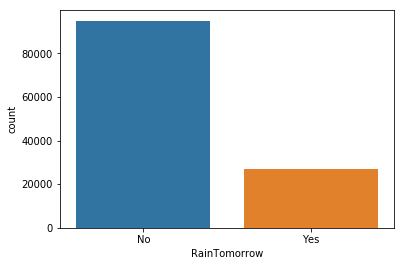

In [72]:
# Target Distribution 
print(Y.value_counts())
sns.countplot(Y)

Text(0.5,1,'Location')

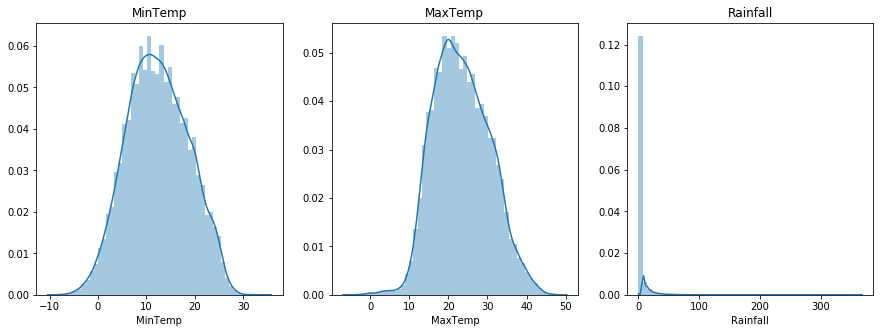

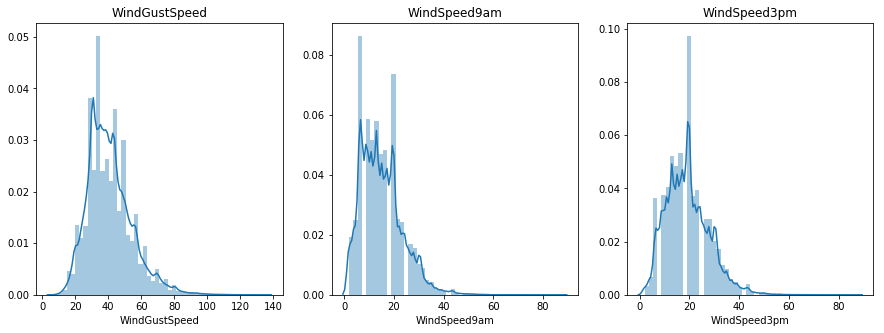

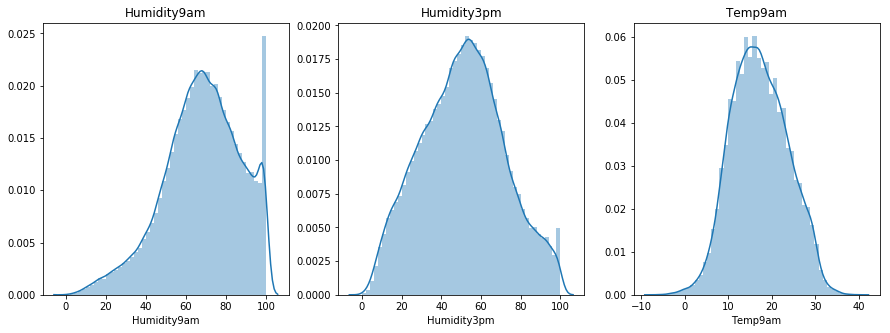

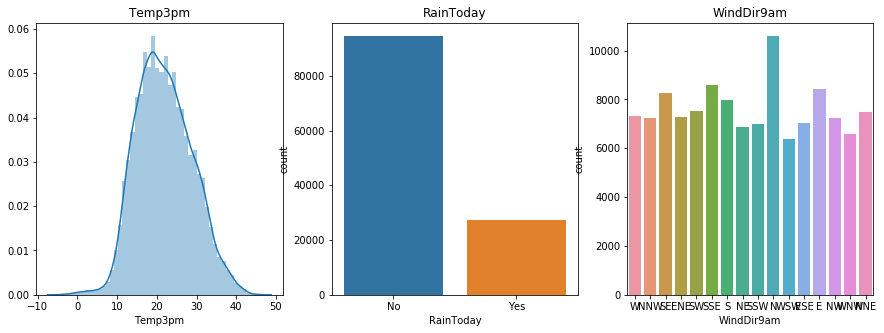

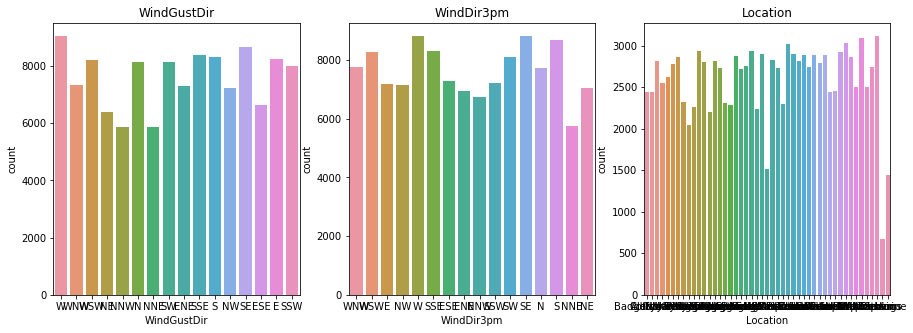

In [76]:
#histogram for all features
plt.figure(1,figsize=[15,5])
plt.subplot(1,3,1)
sns.distplot(X.MinTemp)
plt.title("MinTemp")


plt.figure(1,figsize=[15,5])
plt.subplot(1,3,2)
sns.distplot(X.MaxTemp)
plt.title("MaxTemp")

plt.figure(1,figsize=[15,5])
plt.subplot(1,3,3)
sns.distplot(X.Rainfall)
plt.title("Rainfall")

plt.figure(2,figsize=[15,5])
plt.subplot(1,3,1)
sns.distplot(X.WindGustSpeed)
plt.title("WindGustSpeed")


plt.figure(2,figsize=[15,5])
plt.subplot(1,3,2)
sns.distplot(X.WindSpeed9am)
plt.title("WindSpeed9am")


plt.figure(2,figsize=[15,5])
plt.subplot(1,3,3)
sns.distplot(X.WindSpeed3pm)
plt.title("WindSpeed3pm")

plt.figure(3,figsize=[15,5])
plt.subplot(1,3,1)
sns.distplot(X.Humidity9am)
plt.title("Humidity9am")


plt.figure(3,figsize=[15,5])
plt.subplot(1,3,2)
sns.distplot(X.Humidity3pm)
plt.title("Humidity3pm")


plt.figure(3,figsize=[15,5])
plt.subplot(1,3,3)
sns.distplot(X.Temp9am)
plt.title("Temp9am")

plt.figure(4,figsize=[15,5])
plt.subplot(1,3,1)
sns.distplot(X.Temp3pm)
plt.title("Temp3pm")

plt.figure(4,figsize=[15,5])
plt.subplot(1,3,2)
sns.countplot(X["RainToday"])
plt.title("RainToday")

plt.figure(4,figsize=[15,5])
plt.subplot(1,3,3)
sns.countplot(X["WindDir9am"])
plt.title("WindDir9am")


plt.figure(5,figsize=[15,5])
plt.subplot(1,3,1)
sns.countplot(X["WindGustDir"])
plt.title("WindGustDir")

plt.figure(5,figsize=[15,5])
plt.subplot(1,3,2)
sns.countplot(X["WindDir3pm"])
plt.title("WindDir3pm")

plt.figure(5,figsize=[15,5])
plt.subplot(1,3,3)
sns.countplot(X["Location"])
plt.title("Location")



In [12]:
#information about each numeric features
print(X.describe())

             MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  121790.000000  121790.000000  121790.000000  121790.000000   
mean       12.392117      23.442506       2.356095      40.686542   
std         6.336322       7.140863       8.482433      13.390520   
min        -8.500000      -4.800000       0.000000       7.000000   
25%         7.800000      18.100000       0.000000      31.000000   
50%        12.200000      23.000000       0.000000      39.000000   
75%        17.000000      28.500000       0.800000      48.000000   
max        33.900000      48.100000     367.600000     135.000000   

        WindSpeed9am  WindSpeed3pm    Humidity9am    Humidity3pm  \
count  121790.000000  121790.00000  121790.000000  121790.000000   
mean       15.029888      19.20739      67.685705      50.798990   
std         8.321005       8.58712      19.058076      20.939237   
min         2.000000       2.00000       0.000000       0.000000   
25%         9.000000      13.00000    

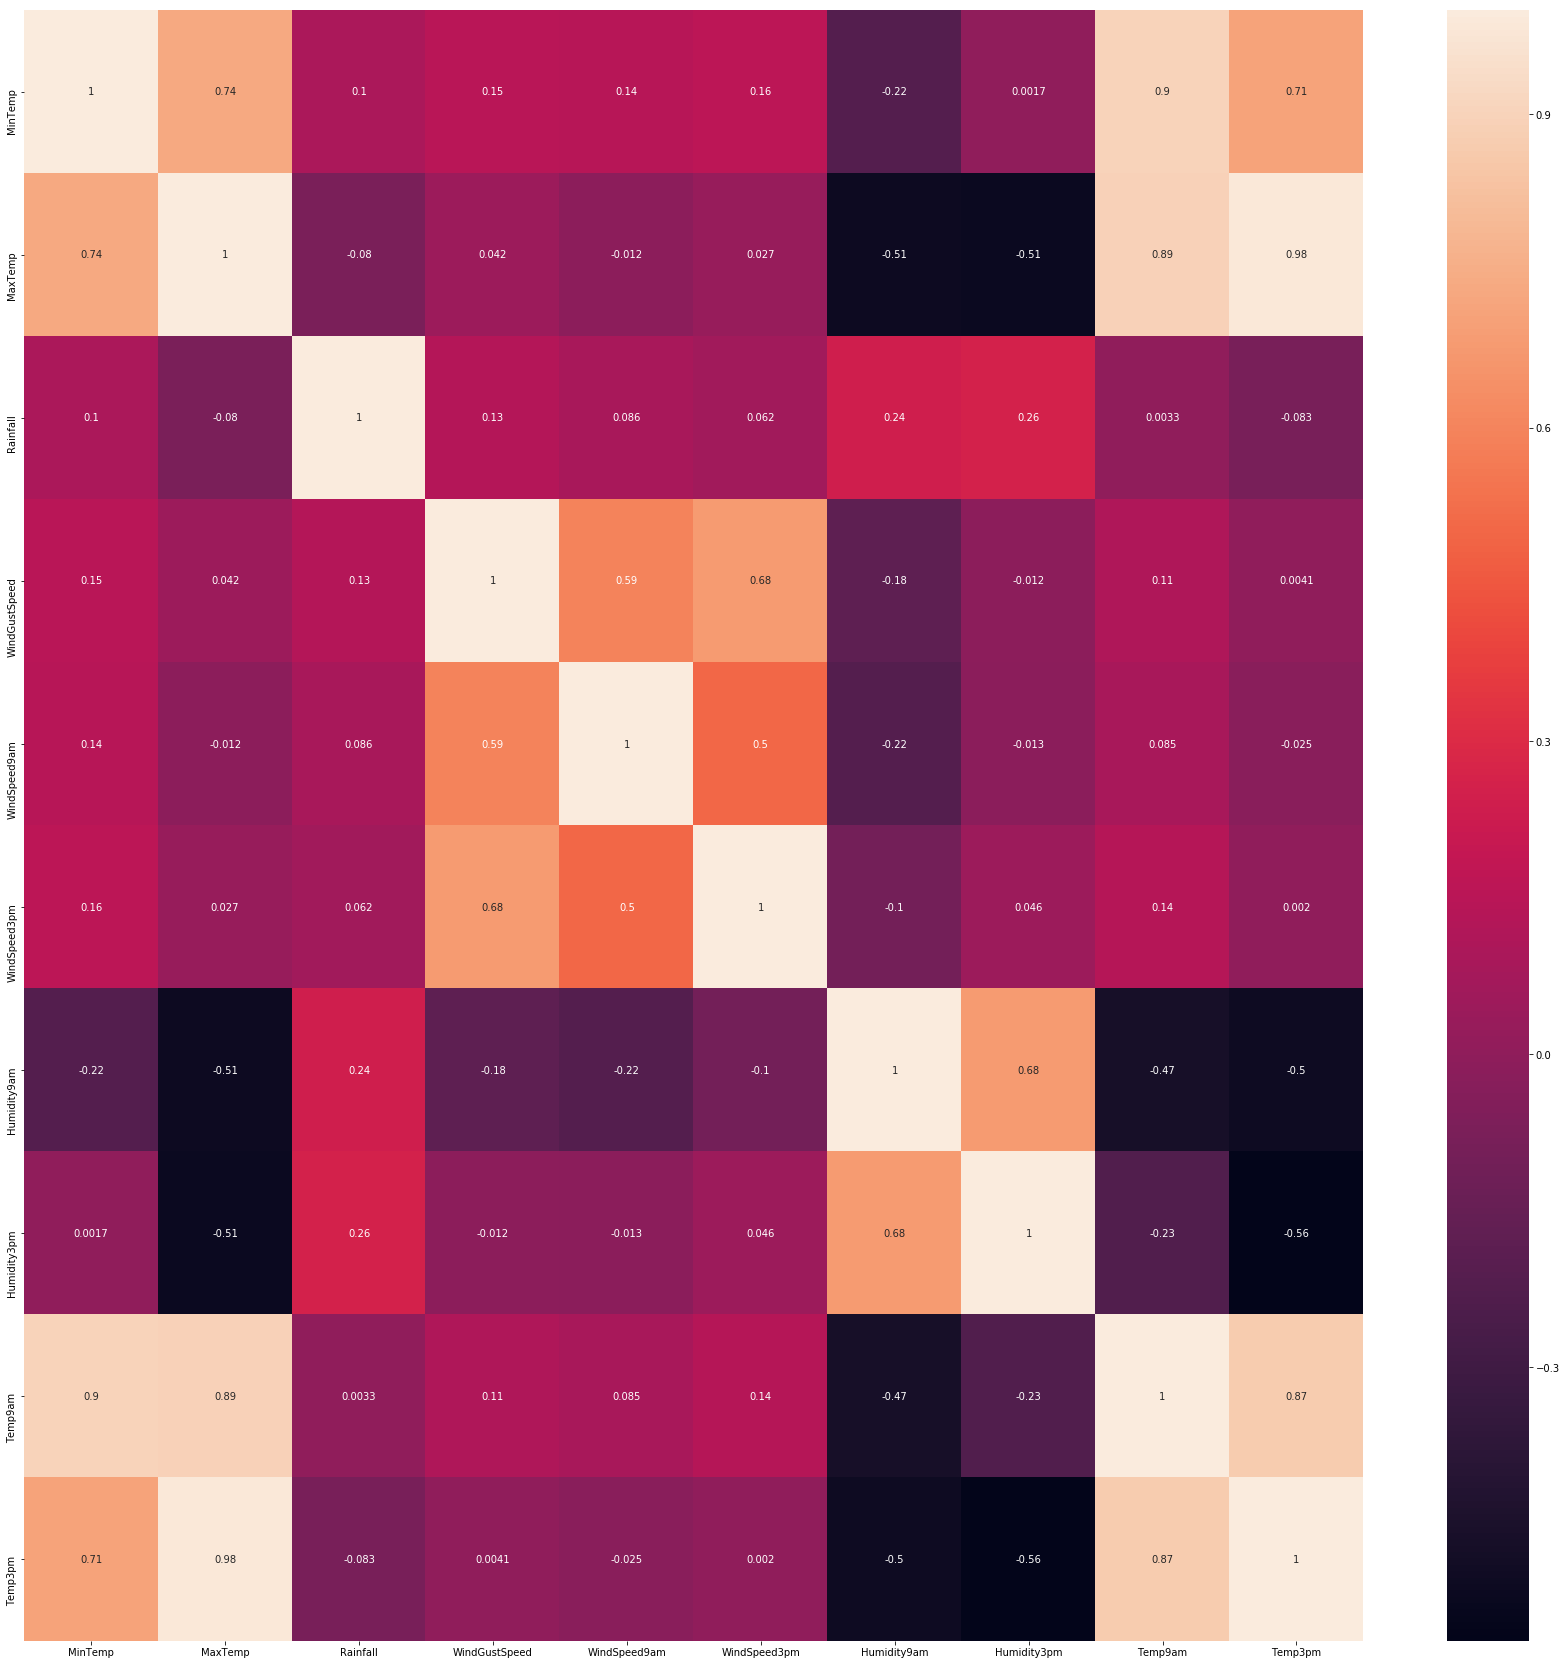

In [85]:
plt.figure(figsize=[30,30])
sns.heatmap(X.corr(), annot = True)

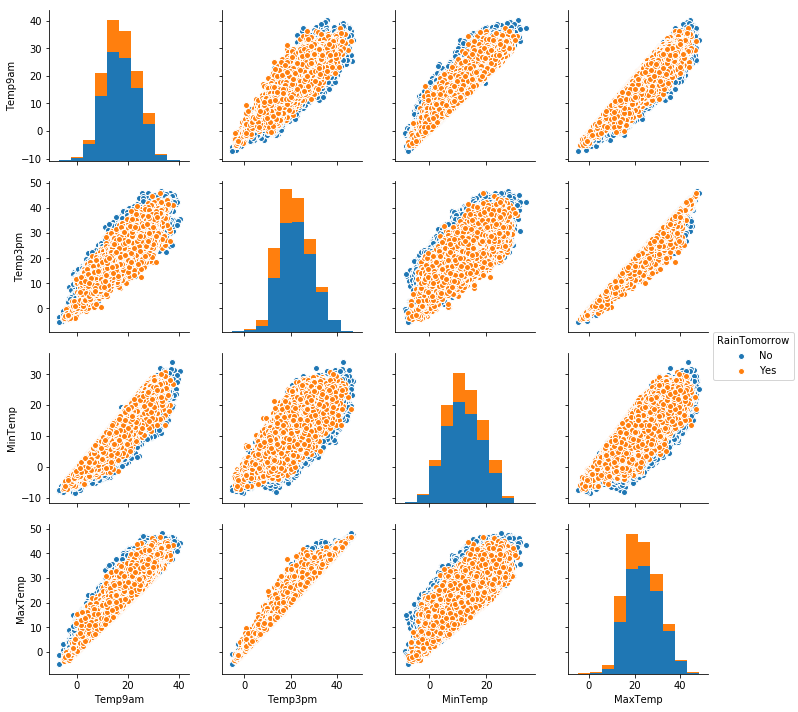

In [80]:
sns.pairplot(mDataDroped[["Temp9am", "Temp3pm", "MinTemp","MaxTemp","RainTomorrow"]],hue='RainTomorrow')

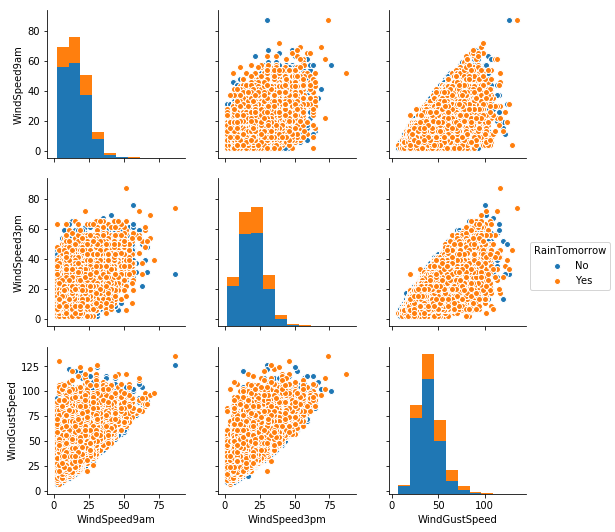

In [82]:
sns.pairplot(mDataDroped[["WindSpeed9am", "WindSpeed3pm",'WindGustSpeed',"RainTomorrow"]],hue='RainTomorrow')

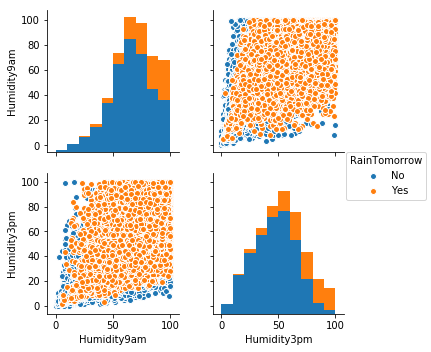

In [83]:
sns.pairplot(mDataDroped[["Humidity9am", "Humidity3pm","RainTomorrow"]],hue='RainTomorrow')

Text(0.5,1,'Temp3pm')

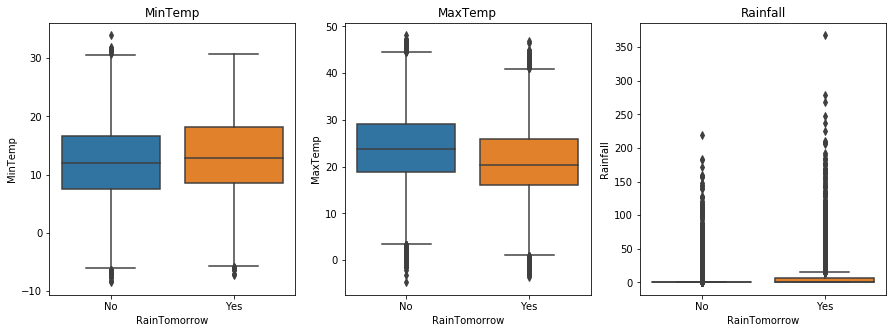

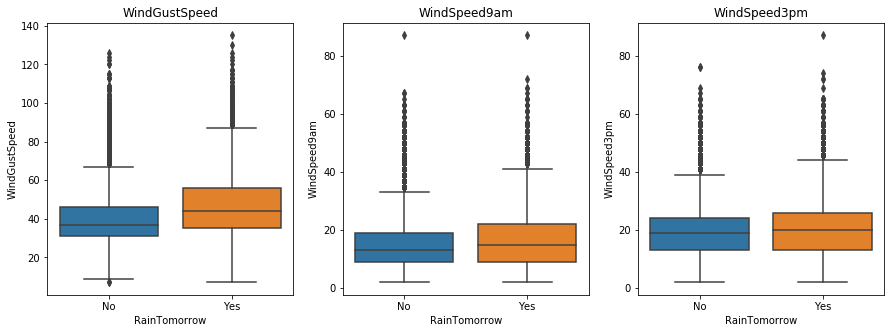

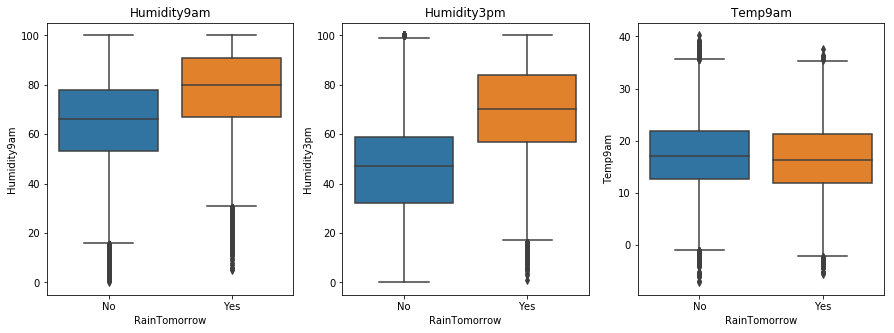

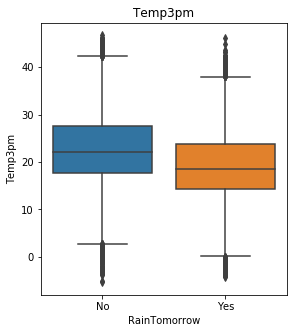

In [64]:
#histogram for numeric attributes
plt.figure(1,figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(x = Y, y = X['MinTemp'])
plt.title("MinTemp")


plt.figure(1,figsize=[15,5])
plt.subplot(1,3,2)
sns.boxplot(x = Y, y = X['MaxTemp'])
plt.title("MaxTemp")

plt.figure(1,figsize=[15,5])
plt.subplot(1,3,3)
sns.boxplot(x = Y, y = X['Rainfall'])
plt.title("Rainfall")

plt.figure(2,figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(x = Y, y = X['WindGustSpeed'])
plt.title("WindGustSpeed")


plt.figure(2,figsize=[15,5])
plt.subplot(1,3,2)
sns.boxplot(x = Y, y = X['WindSpeed9am'])
plt.title("WindSpeed9am")


plt.figure(2,figsize=[15,5])
plt.subplot(1,3,3)
sns.boxplot(x = Y, y = X['WindSpeed3pm'])
plt.title("WindSpeed3pm")

plt.figure(3,figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(x = Y, y = X['Humidity9am'])
plt.title("Humidity9am")


plt.figure(3,figsize=[15,5])
plt.subplot(1,3,2)
sns.boxplot(x = Y, y = X['Humidity3pm'])
plt.title("Humidity3pm")


plt.figure(3,figsize=[15,5])
plt.subplot(1,3,3)
sns.boxplot(x = Y, y = X['Temp9am'])
plt.title("Temp9am")

plt.figure(4,figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(x = Y, y = X['Temp3pm'])
plt.title("Temp3pm")









Text(0,0.5,'Frequancy')

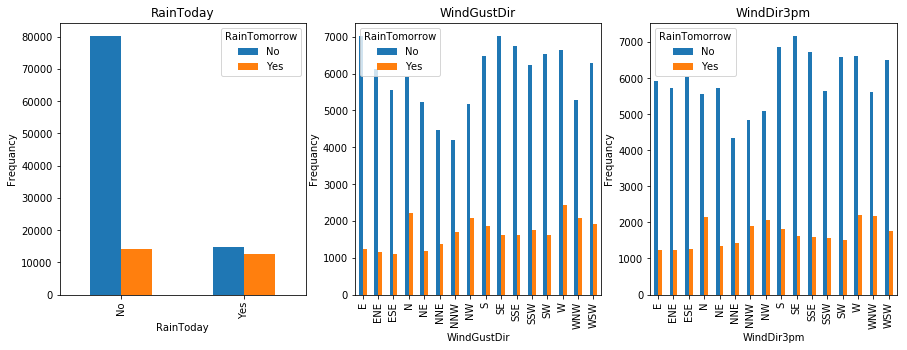

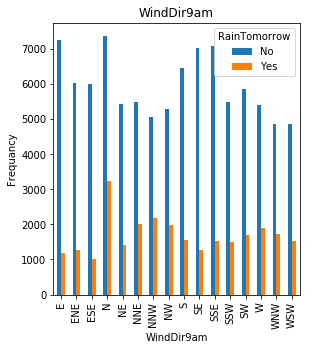

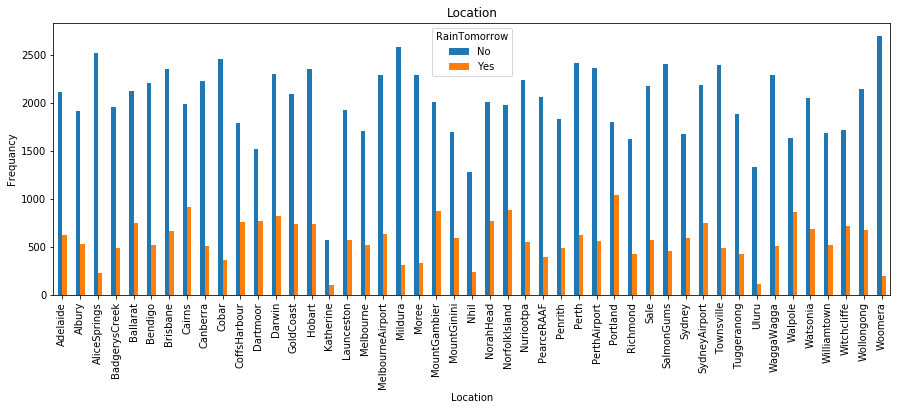

In [63]:
plt.figure(4,figsize=[15,5])
ax=plt.subplot(1,3,1)
pd.crosstab(X.RainToday,Y).plot(kind="bar",ax=ax)
plt.title("RainToday")
plt.ylabel('Frequancy')


plt.figure(4,figsize=[15,5])
ax=plt.subplot(1,3,2)
pd.crosstab(X.WindGustDir,Y).plot(kind="bar",ax=ax)
plt.title("WindGustDir")
plt.ylabel('Frequancy')




plt.figure(4,figsize=[15,5])
ax=plt.subplot(1,3,3)
pd.crosstab(X.WindDir3pm,Y).plot(kind="bar",ax=ax)
plt.title("WindDir3pm")
plt.ylabel('Frequancy')

plt.figure(5,figsize=[15,5])
ax=plt.subplot(1,3,1)
pd.crosstab(X.WindDir9am,Y).plot(kind="bar",ax=ax)
plt.title("WindDir9am")
plt.ylabel('Frequancy')

plt.figure(6,figsize=[15,5])
ax=plt.subplot(1,1,1)
pd.crosstab(X.Location,Y).plot(kind="bar",ax=ax)
plt.title("Location")
plt.ylabel('Frequancy')
